# DataFrames, Data Visualization, and Linear Regression: A Data Science Tutorial

By Noah K. Cattell


## What is this tutorial?

The goal of this tutorial is to accomplish four things: to provide a brief introduction into the DataFrame structure and how it is used in data science statistics, to give some implementation and ideas as to how one might construct various visual representations using a pandas DataFrame object, to provide an introduction into the principles of machine learning using hypothesis testing and linear regression, and to encourage data scientists to provide and utilize a different outlook of their data when doing data analysis.  This tutorial is aimed at novice data scientists who are just learning the introductory data science principles but have experience with scripting languages (specifically Python, in our case), or for experienced data scientists who want to learn some quick tips about how to use Python for data analysis.

Basically, this tutorial is all about first steps: What does one do when initially examining a large set of data?  How does one graphically or visually display such data in a meaningful context?  What are the benefits and pitfalls of some of these representations?  Is there a way to derive more meaning from the data than just some graphical representations and a cool chart?

I believe that one can use data science principles to make sense of even the most obtuse datasets, especially when it comes to visual representation, and this tutorial will provide you the first stepping-stone to doing just that.


## Content

Here’s a brief list of the topics covered in this tutorial:

Introduction

Installing the libraries

Loading data

What is a DataFrame: basic DataFrame operations

Basic plotting with a DataFrame 

Analyzing Data Plots

Introduction to hypothesis testing and linear regression

Using hypothesis testing to make a point

More plotting and data representation

In [ ]:
<a id='1'></a>

## Installing the libraries

In this tutorial, I primarily use pandas, matplotlib, seaborn, statsmodels, and scikit-learn (used in the code as sklearn), with also some methods from numpy and scipy.  If you are using the Anaconda platform, you can simply go to the environments tab to make sure everything is installed correctly. For me, all of these were already installed, but you can go to the all tab in the dropdown and search for the name of each module to make sure, just in case.

However, in the case that you don’t have or don’t want to use Anaconda, I’ll walk through a basic install process.  For the sklearn package, you will need to use pip, python’s usual way of installing more python packages.  If you don’t have pip (you should, but if for some magical reason you don’t), you should download get-pip.py, and then run it using:

	python get-pip.py

From there, pip is installed.  Before installing sklearn, you should also see if numpy and scipy are also installed on your machine, as it relies on both of these packages.  From there, on windows you can simply run:

	pip install -u scikit-learn
    
to install the package. 


## Loading data
Once you’ve installed all of the relevant packages, you’re ready to begin.  In this tutorial, I primarily use data from http://www2.census.gov/govs/state/2015_summary_table.xls.  This data is a summary of each state’s education budget for FY 2015, and has a bunch of different metrics and the like relating to such.  I saved this file as 2015_summary_table.xls in my project folder.
Once you’ve downloaded the relevant file, you’ll want to import into pandas as an ExcelFile.  This creates an object that pandas can then use (below) to create a DataFrame object, from which we will do most of our data analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model

xl = pd.ExcelFile("2015_summary_table.xls")
xl.sheet_names

['2015 Publication Table']

## What is a DataFrame: basic DataFrame operations

So, now we’ve got this thing, this DataFrame.  What is it?  Why is it useful to us?

A DataFrame is first like a massive two-dimensional array, where we can store a massive amount of data simply and easily. Not only that, but a DataFrame object’s data can be accessed both by column and row, so we can get whatever piece of information we want, whenever we want.  Information can be put into a DataFrame from many different kinds of basic data types, from Series and lists, to files as we’re doing here, Excel files (.xls, .xlsx) and CSV files (.csv).  You can also import scraped text or HTML data into DataFrames by transforming it into lists or series before inserting it into the DataFrame.  For more information on pandas’s DataFrame object, go here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html.

First, we want to create our DataFrame object here by parsing a specific sheet on our ExcelFile.  For simplicity’s sake, I’ve included how we can find our sheet using python (if we don’t necessarily know what our sheet name is) and how to parse it into our new DataFrame.  (You’ll see some other examples of how to create DataFrames throughout the tutorial, note the difference in data type and how each is created.)

In [3]:
df = xl.parse("2015 Publication Table")
df.head()

,US,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Total revenue,2.203631e+09,26896290.0,8419335.0,35346766.0,21665918.0,332456557.0,35106931.0,30307639.0,8268967.0,91563525.0,...,4875457.0,30806454.0,138669933.0,18621543.0,6325712.0,51920942.0,50247419.0,14387594.0,42099547.0,7261528.0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
General revenue,1.854018e+09,24624640.0,7693036.0,31212866.0,19379762.0,265498842.0,28839683.0,26635794.0,7573457.0,79487553.0,...,4169927.0,27632347.0,124039294.0,15665711.0,6008737.0,44324730.0,41439464.0,13075676.0,33475661.0,6045155.0
Intergovernmental revenue,6.048603e+08,8838667.0,2642995.0,12752207.0,7002577.0,82907118.0,7866964.0,6898669.0,1974674.0,26270941.0,...,1498716.0,10568128.0,43863312.0,4207318.0,2107303.0,10177643.0,13333571.0,4654167.0,9440463.0,2204470.0
Taxes,9.116978e+08,9755439.0,1394310.0,14082100.0,9190212.0,151234165.0,12797117.0,16224696.0,3513916.0,37217759.0,...,1674108.0,12698496.0,55086438.0,6703356.0,3043152.0,20536885.0,20644454.0,5565985.0,17019026.0,2356323.0


However, once our data is in our DataFrame, that doesn’t mean everything is already curated and ready to go.  We see some rows that are entitled NaN.  Thus, our next question is what is NaN?  NaN stands for “not a number” or, more to the point, in this case it means that the data in the excel cell associated with that particular row was not a number , was undefined, or was otherwise unreadable by our parsing function.  We can drop these values easily enough, however, and continue with our data analysis.  (For more information, you can go to the pandas page on “Working with missing data” here: http://pandas.pydata.org/pandas-docs/stable/missing_data.html.)

In [4]:
df.dropna(how="all", inplace=True)
df.head()

,US,AL,AK,AZ,AR,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VT,VA,WA,WV,WI,WY
Total revenue,2.203631e+09,26896290.0,8419335.0,35346766.0,21665918.0,332456557.0,35106931.0,30307639.0,8268967.0,91563525.0,...,4875457.0,30806454.0,138669933.0,18621543.0,6325712.0,51920942.0,50247419.0,14387594.0,42099547.0,7261528.0
General revenue,1.854018e+09,24624640.0,7693036.0,31212866.0,19379762.0,265498842.0,28839683.0,26635794.0,7573457.0,79487553.0,...,4169927.0,27632347.0,124039294.0,15665711.0,6008737.0,44324730.0,41439464.0,13075676.0,33475661.0,6045155.0
Intergovernmental revenue,6.048603e+08,8838667.0,2642995.0,12752207.0,7002577.0,82907118.0,7866964.0,6898669.0,1974674.0,26270941.0,...,1498716.0,10568128.0,43863312.0,4207318.0,2107303.0,10177643.0,13333571.0,4654167.0,9440463.0,2204470.0
Taxes,9.116978e+08,9755439.0,1394310.0,14082100.0,9190212.0,151234165.0,12797117.0,16224696.0,3513916.0,37217759.0,...,1674108.0,12698496.0,55086438.0,6703356.0,3043152.0,20536885.0,20644454.0,5565985.0,17019026.0,2356323.0
General sales,2.863831e+08,2463912.0,0.0,6466167.0,3182211.0,38464704.0,2817773.0,4082787.0,0.0,21800895.0,...,970784.0,6548032.0,33664187.0,1882901.0,366667.0,3793215.0,12517831.0,1293327.0,4892126.0,811105.0


Finally, we also see that in this particular dataset the categories are displayed as the row titles or rows in our DataFrame, and the state names/country name are displayed as the column titles.  When using a pandas DataFrame, generally most functions/operations work along columns, although in theory you could use rows just as well.  For time and convention’s sake, let’s just transpose our DataFrame so that we can have our states/country as row titles.

An important thing to note about pandas DataFrames: each individual DataFrame has an index of all of the rows in that DataFrame.  Usually (and with a blank set of data) this is just a set of numbers from 0 to however many rows there are.  In our case, however, since we imported it from an Excel file, our index is the names of each of our states or country.  (You can change the index or the columns by using panda’s reindex function: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html.)

In [5]:
df = df.T
df.head()

,Total revenue,General revenue,Intergovernmental revenue,Taxes,General sales,Selective sales,License taxes,Individual income tax,Corporate income tax,Other taxes,...,Natural resources,Parks and recreation,Governmental administration,Interest on general debt,Other and unallocable,Utility expenditure,Liquor stores expenditure,Insurance trust expenditure,Debt at end of fiscal year,Cash and security holdings
US,2.203631e+09,1.854018e+09,604860293.0,911697759.0,286383078.0,144933354.0,52032020.0,336172978.0,48685262.0,43491067.0,...,22474531.0,6168767.0,55886945.0,44905777.0,137106735.0,28891700.0,6099386.0,316628497.0,1.149926e+09,4.764323e+09
AL,2.689629e+07,2.462464e+07,8838667.0,9755439.0,2463912.0,2472137.0,493883.0,3336587.0,533586.0,455334.0,...,281706.0,19647.0,608951.0,366143.0,1061141.0,0.0,289408.0,3651229.0,8.969350e+06,4.486136e+07
AK,8.419335e+06,7.693036e+06,2642995.0,1394310.0,0.0,255971.0,146846.0,0.0,227852.0,763641.0,...,375310.0,23949.0,752588.0,250304.0,3219936.0,164140.0,0.0,1294550.0,5.727891e+06,8.130678e+07
AZ,3.534677e+07,3.121287e+07,12752207.0,14082100.0,6466167.0,1780226.0,458737.0,3760883.0,690960.0,925127.0,...,279188.0,63044.0,751641.0,401481.0,2954846.0,29038.0,0.0,4485569.0,1.424366e+07,5.894487e+07
AR,2.166592e+07,1.937976e+07,7002577.0,9190212.0,3182211.0,1228129.0,384306.0,2664153.0,476553.0,1254860.0,...,246045.0,63732.0,604315.0,135508.0,931792.0,0.0,0.0,1882832.0,4.985140e+06,3.360313e+07


## Basic plotting with a DataFrame

Now we have our DataFrame, with all undefined values removed or otherwise transformed, and everything formatted the way we want.  Let’s look at some data shall we?  How about a simply x-y plot of two variables in our dataset:

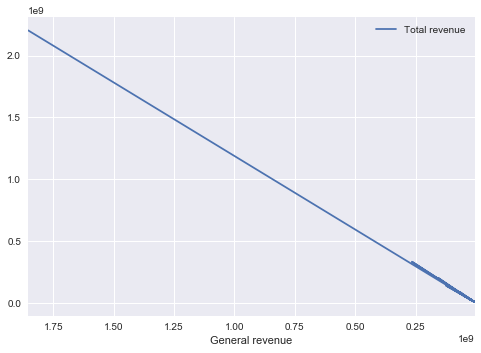

In [6]:
plt.figure()
df.plot(x="General revenue",y="Total revenue")
plt.show()

That… doesn’t really help all that much.  We know that these two things probably have a linear relationship, but we can’t see any of the individual points, and the scale is far too large for it to be reasonably well interpreted.  Let’s see if a scatter plot is any more enlightening:

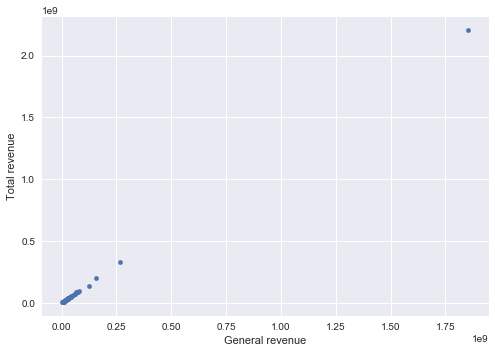

In [7]:
plt.figure()
df.plot.scatter(x="General revenue",y="Total revenue")
plt.show()

Well, our scatter plot did give us a bit more information than before, and it told us that there’s a massive outlier.  If we look in our displayed DataFrame (above), we can see that the entire US is treated as one of the data points in our dataset.  Obviously, if we’re comparing states within the United States, values for the entire United States as a whole aren’t going to be very useful.  Let’s re-examine our graph without this outlier:  (Thankfully, DataFrames can just drop rows or columns based on a simple function: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html .)

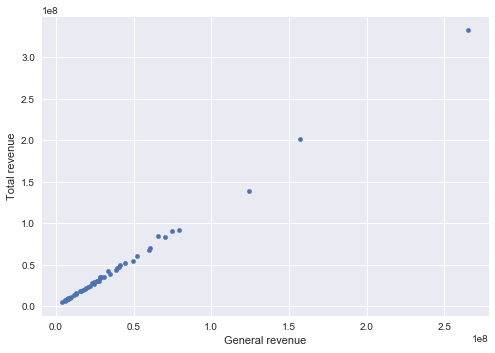

In [8]:
df_no_US = df.drop('US')
plt.figure()
df_no_US.plot.scatter(x="General revenue",y="Total revenue")
plt.show()

Alright, so that’s a bit better.  We can see a large clump of states with lower general revenues and lower total revenues, and then three states with much larger total and general revenues (Texas, New York, and California).  Still not very helpful though; I think anyone that’s spent a decent amount of time in the US knows that.  Let’s see if we can derive any more information from our dataset by using a histogram:

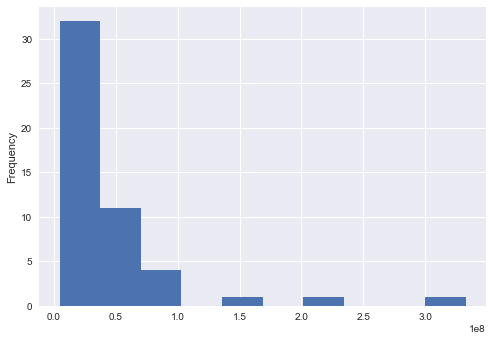

In [43]:
df_hist = df_no_US['Total revenue']
plt.figure()
df_hist.plot.hist(label='Total revenue')
plt.show()

## Analyzing data plots

Well, this was certainly helpful.  Over 40 states have total educational revenue of less than 50 million dollars, and almost all below 100 million.  Still, that’s just a surface-level comparison of how much each state makes.  Let’s see if by annotating our graphs we can discover any new information:

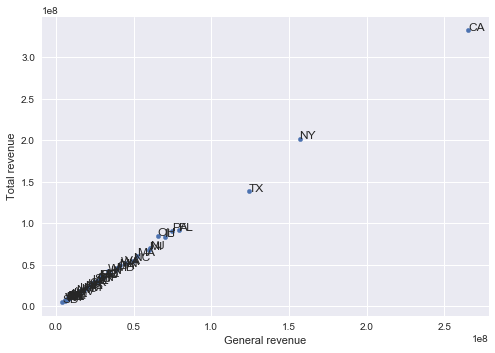

In [10]:
plt.figure()
fig, ax = plt.subplots()
df_no_US.plot(x="General revenue",y="Total revenue", kind='scatter', ax=ax)
for k, v in df_no_US.iterrows():
    ax.annotate(k,[v['General revenue'], v['Total revenue']])
    
plt.show()

It doesn’t appear that way.  Even if we cut out the largest three, there are still far too many states clumped together to give us a real sense of which state falls where in the order of who spends how much. Furthermore, these are still all real values, not proportional ones, so we can’t tell how much proportionally each state gets revenue from as general revenue.

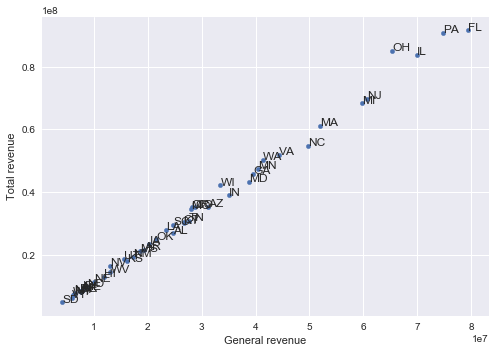

In [11]:
df_no_outliers = df[df['General revenue'] < 100000000]

plt.figure(figsize=(8,20))
fig, ax = plt.subplots()
df_no_outliers.plot(x="General revenue",y="Total revenue", kind='scatter', ax=ax)
for k, v in df_no_outliers.iterrows():
    ax.annotate(k,[v['General revenue'], v['Total revenue']])

plt.show()

So, let’s do precisely that.  By iterating through our DataFrame and performing row-wise operations, we can add a whole new column to our DataFrame showing how much proportionally of each state’s revenue is general revenue.  (The iterrows function: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html .)  (It’s all the way to the right, if you’re looking.)

In [12]:
df_percent_revenue = df_no_US.copy()
general = []
for index, row in df_percent_revenue.iterrows():
    general.append(row['General revenue']/row['Total revenue'])
df_percent_revenue['Fractional general revenue'] = general
df_percent_revenue.head()

,Total revenue,General revenue,Intergovernmental revenue,Taxes,General sales,Selective sales,License taxes,Individual income tax,Corporate income tax,Other taxes,...,Parks and recreation,Governmental administration,Interest on general debt,Other and unallocable,Utility expenditure,Liquor stores expenditure,Insurance trust expenditure,Debt at end of fiscal year,Cash and security holdings,Fractional general revenue
AL,26896290.0,24624640.0,8838667.0,9755439.0,2463912.0,2472137.0,493883.0,3336587.0,533586.0,455334.0,...,19647.0,608951.0,366143.0,1061141.0,0.0,289408.0,3651229.0,8969350.0,44861358.0,0.915540
AK,8419335.0,7693036.0,2642995.0,1394310.0,0.0,255971.0,146846.0,0.0,227852.0,763641.0,...,23949.0,752588.0,250304.0,3219936.0,164140.0,0.0,1294550.0,5727891.0,81306779.0,0.913734
AZ,35346766.0,31212866.0,12752207.0,14082100.0,6466167.0,1780226.0,458737.0,3760883.0,690960.0,925127.0,...,63044.0,751641.0,401481.0,2954846.0,29038.0,0.0,4485569.0,14243659.0,58944872.0,0.883047
AR,21665918.0,19379762.0,7002577.0,9190212.0,3182211.0,1228129.0,384306.0,2664153.0,476553.0,1254860.0,...,63732.0,604315.0,135508.0,931792.0,0.0,0.0,1882832.0,4985140.0,33603128.0,0.894481
CA,332456557.0,265498842.0,82907118.0,151234165.0,38464704.0,13947655.0,9420863.0,77929551.0,9007182.0,2464210.0,...,529286.0,7485654.0,7168706.0,10218125.0,2687071.0,0.0,57750839.0,151715007.0,845232818.0,0.798597


And now let’s plot our proportional general revenue with our total revenue:

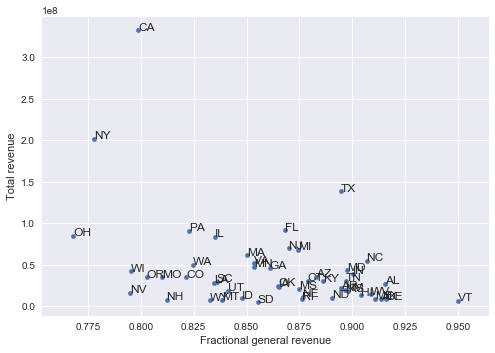

In [13]:
plt.figure()
fig, ax = plt.subplots()
df_percent_revenue.plot(x="Fractional general revenue",y="Total revenue", kind='scatter', ax=ax)
for k, v in df_percent_revenue.iterrows():
    ax.annotate(k,[v['Fractional general revenue'], v['Total revenue']])
plt.show()

Well, this is certainly more enlightening than most of our previous graphs.  However, it doesn’t look like there’s any real trend to the data here, just a lot of variation between states.  Let’s see if we can find a better relationship by looking at two proportional statistics: proportional general revenue and the proportion of a state’s revenue for education that is raised through taxes.

In [14]:
df_tax_revenue = df_percent_revenue.copy()
tax = []
for index, row in df_percent_revenue.iterrows():
    tax.append(row['Fractional general revenue'] * row['Taxes']/row['General revenue'] )
df_tax_revenue['Fractional tax revenue'] = tax
df_tax_revenue.head()

,Total revenue,General revenue,Intergovernmental revenue,Taxes,General sales,Selective sales,License taxes,Individual income tax,Corporate income tax,Other taxes,...,Governmental administration,Interest on general debt,Other and unallocable,Utility expenditure,Liquor stores expenditure,Insurance trust expenditure,Debt at end of fiscal year,Cash and security holdings,Fractional general revenue,Fractional tax revenue
AL,26896290.0,24624640.0,8838667.0,9755439.0,2463912.0,2472137.0,493883.0,3336587.0,533586.0,455334.0,...,608951.0,366143.0,1061141.0,0.0,289408.0,3651229.0,8969350.0,44861358.0,0.915540,0.362706
AK,8419335.0,7693036.0,2642995.0,1394310.0,0.0,255971.0,146846.0,0.0,227852.0,763641.0,...,752588.0,250304.0,3219936.0,164140.0,0.0,1294550.0,5727891.0,81306779.0,0.913734,0.165608
AZ,35346766.0,31212866.0,12752207.0,14082100.0,6466167.0,1780226.0,458737.0,3760883.0,690960.0,925127.0,...,751641.0,401481.0,2954846.0,29038.0,0.0,4485569.0,14243659.0,58944872.0,0.883047,0.398399
AR,21665918.0,19379762.0,7002577.0,9190212.0,3182211.0,1228129.0,384306.0,2664153.0,476553.0,1254860.0,...,604315.0,135508.0,931792.0,0.0,0.0,1882832.0,4985140.0,33603128.0,0.894481,0.424178
CA,332456557.0,265498842.0,82907118.0,151234165.0,38464704.0,13947655.0,9420863.0,77929551.0,9007182.0,2464210.0,...,7485654.0,7168706.0,10218125.0,2687071.0,0.0,57750839.0,151715007.0,845232818.0,0.798597,0.454899


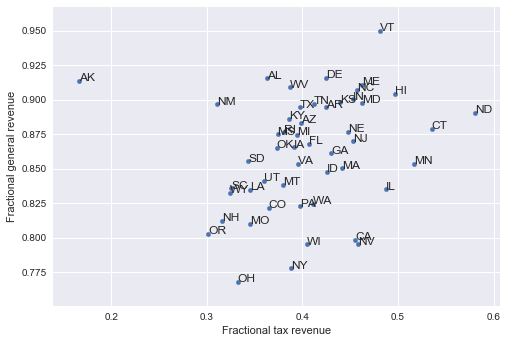

In [15]:
plt.figure()
fig, ax = plt.subplots()
df_tax_revenue.plot(x="Fractional tax revenue",y="Fractional general revenue", kind='scatter', ax=ax)
for k, v in df_tax_revenue.iterrows():
    ax.annotate(k,[v['Fractional tax revenue'], v['Fractional general revenue']])
plt.show()

## Introduction to hypothesis testing and linear regression

This data looks like it actually may have a statistical, observable pattern to it.  Let’s make a formal hypothesis claim about this dataset.  Let us say that our null hypothesis is that proportional tax revenue for each state is linearly related to our proportional general revenue, and our alternative hypothesis is that these two are not linearly related.  Let’s also assume that they’re largely independent of each other, and that the deciding test statistic to assume the null hypothesis is the correlation, or r-squared, of our dataset to some linear fit line, where a correlation of > .5 indicates that there is a linear relationship.

However, before we get too ahead of ourselves, we should ask the question of what is a hypothesis test?  Simply put, it’s a measure by which we can use statistics to accept or reject certain hypotheses about our data.  Generally, one would want to use a t-test, a z-test, or some other kind of statistical test for hypothesis testing, but for our purposes setting a threshold on correlation will work just fine.  (Wikipedia: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing )

For this type of thing, we shall choose to use linear regression, a means by which a series of points are compared to a fitted line.  A plot of this regression is shown below.  (Wikipedia: https://en.wikipedia.org/wiki/Linear_regression)

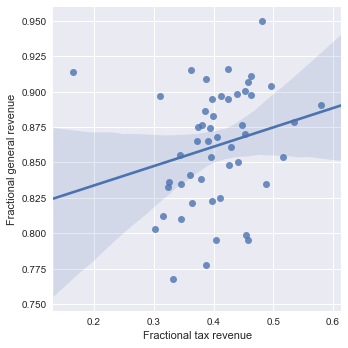

In [16]:
sns.lmplot(x='Fractional tax revenue',y='Fractional general revenue',data=df_tax_revenue,fit_reg=True)
plt.show()

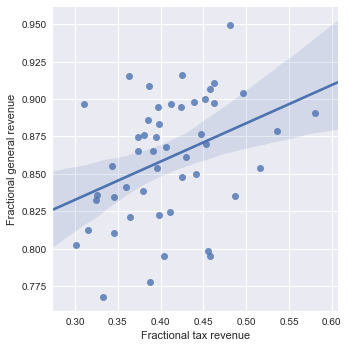

,Total revenue,General revenue,Intergovernmental revenue,Taxes,General sales,Selective sales,License taxes,Individual income tax,Corporate income tax,Other taxes,...,Governmental administration,Interest on general debt,Other and unallocable,Utility expenditure,Liquor stores expenditure,Insurance trust expenditure,Debt at end of fiscal year,Cash and security holdings,Fractional general revenue,Fractional tax revenue
AL,26896290.0,24624640.0,8838667.0,9755439.0,2463912.0,2472137.0,493883.0,3336587.0,533586.0,455334.0,...,608951.0,366143.0,1061141.0,0.0,289408.0,3651229.0,8969350.0,44861358.0,0.915540,0.362706
AZ,35346766.0,31212866.0,12752207.0,14082100.0,6466167.0,1780226.0,458737.0,3760883.0,690960.0,925127.0,...,751641.0,401481.0,2954846.0,29038.0,0.0,4485569.0,14243659.0,58944872.0,0.883047,0.398399
AR,21665918.0,19379762.0,7002577.0,9190212.0,3182211.0,1228129.0,384306.0,2664153.0,476553.0,1254860.0,...,604315.0,135508.0,931792.0,0.0,0.0,1882832.0,4985140.0,33603128.0,0.894481,0.424178
CA,332456557.0,265498842.0,82907118.0,151234165.0,38464704.0,13947655.0,9420863.0,77929551.0,9007182.0,2464210.0,...,7485654.0,7168706.0,10218125.0,2687071.0,0.0,57750839.0,151715007.0,845232818.0,0.798597,0.454899
CO,35106931.0,28839683.0,7866964.0,12797117.0,2817773.0,1976239.0,680739.0,6360629.0,669054.0,292683.0,...,877481.0,886621.0,1565002.0,13303.0,0.0,5670780.0,17200428.0,76870758.0,0.821481,0.364518


In [17]:
df_outlier_removal = df_tax_revenue.copy()
df_outlier_removal = df_outlier_removal[df_outlier_removal['Fractional tax revenue'] > 0.2]
sns.lmplot(x='Fractional tax revenue',y='Fractional general revenue',data=df_outlier_removal,fit_reg=True)
plt.show()

We can get data about a fitted model by using scikit-learn’s linear_model, where we can fit one or more free variables (our x-parameters, or the first argument in our function) to another variable that we think there is a relationship, and then use the score function to see our correlation factor.

In [18]:
reg = linear_model.LinearRegression()
reg.fit(df_outlier_removal[['Fractional tax revenue']], df_outlier_removal['Fractional general revenue'])
reg.score(df_outlier_removal[['Fractional tax revenue']], df_outlier_removal['Fractional general revenue'])

0.141456727978862

Since our correlation factor here is far less than 0.5, we reject the null hypothesis.  Thus, it seems as though our fractional tax revenue and fractional general revenue are not linearly related.

## Using hypothesis testing to make a point

Now, let’s move on to a larger example, in which we examine many different proportional aspects of our original dataset, and put them in a new DataFrame.  Let’s also say that for each combination of these parameters, our null and alternate hypotheses are the same as in our first example.  

In [20]:
indiv_income = []
corp_income = []
total_income = []
general_sales = []
selective_sales = []
total_sales = []

for index, row in df_percent_revenue.iterrows():
    indiv_income.append(row['Individual income tax']/row['Taxes'])
    corp_income.append(row['Corporate income tax']/row['Taxes'])
    total_income.append((row['Corporate income tax'] + row['Individual income tax'])/row['Taxes'])
    general_sales.append(row['General sales']/row['Taxes'])
    selective_sales.append(row['Selective sales']/row['Taxes'])
    total_sales.append((row['Selective sales'] + row['General sales'])/row['Taxes'])

proportional_tax = pd.DataFrame(
    {'Individual income tax': indiv_income,
     'Corporate income tax': corp_income,
     'Total income tax': total_income,
     'General sales tax': general_sales,
     'Selective sales tax': selective_sales,
     'Total sales tax': total_sales }, index = df_percent_revenue.index)
proportional_tax.head()

,Corporate income tax,General sales tax,Individual income tax,Selective sales tax,Total income tax,Total sales tax
AL,0.054696,0.252568,0.342023,0.253411,0.396720,0.505979
AK,0.163416,0.000000,0.000000,0.183583,0.163416,0.183583
AZ,0.049067,0.459176,0.267068,0.126418,0.316135,0.585594
AR,0.051854,0.346261,0.289890,0.133634,0.341745,0.479895
CA,0.059558,0.254339,0.515291,0.092226,0.574849,0.346564


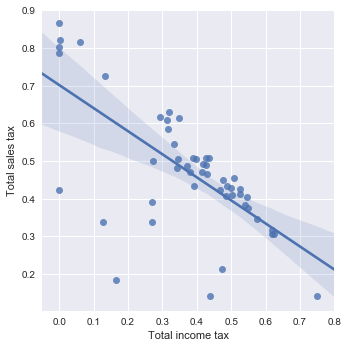

In [21]:
sns.lmplot(data=proportional_tax, x="Total income tax", y="Total sales tax",fit_reg = True)
plt.show()

In [22]:
reg.fit(proportional_tax[['Total income tax']], proportional_tax['Total sales tax'])
reg.score(proportional_tax[['Total income tax']], proportional_tax['Total sales tax'])

0.46092166300436038

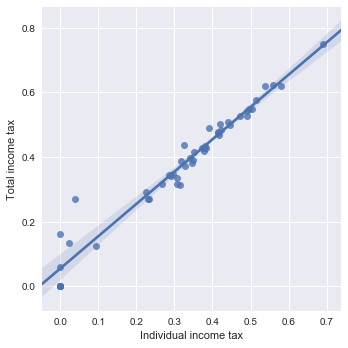

In [23]:
sns.lmplot(data=proportional_tax, x="Individual income tax", y="Total income tax",fit_reg = True)
plt.show()

In [24]:
reg.fit(proportional_tax[['Individual income tax']], proportional_tax['Total income tax'])
reg.score(proportional_tax[['Individual income tax']], proportional_tax['Total income tax'])

0.95268144053187731

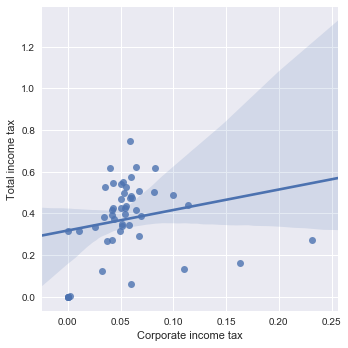

In [25]:
sns.lmplot(data=proportional_tax, x="Corporate income tax", y="Total income tax",fit_reg = True)
plt.show()

In [26]:
reg.fit(proportional_tax[['Corporate income tax']], proportional_tax['Total income tax'])
reg.score(proportional_tax[['Corporate income tax']], proportional_tax['Total income tax'])

0.045705199324612596

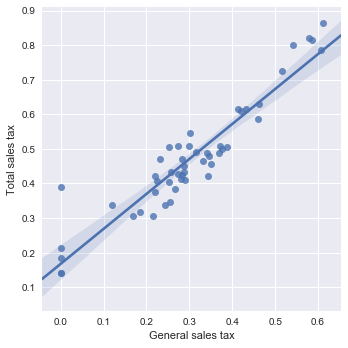

In [27]:
sns.lmplot(data=proportional_tax, x="General sales tax", y="Total sales tax",fit_reg = True)
plt.show()

In [28]:
reg.fit(proportional_tax[['General sales tax']], proportional_tax['Total sales tax'])
reg.score(proportional_tax[['General sales tax']], proportional_tax['Total sales tax'])

0.87911289790031333

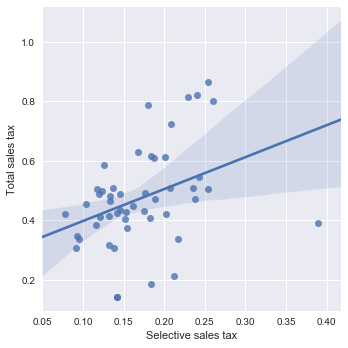

In [29]:
sns.lmplot(data=proportional_tax, x="Selective sales tax", y="Total sales tax",fit_reg = True)
plt.show()

In [30]:
reg.fit(proportional_tax[['Selective sales tax']], proportional_tax['Total sales tax'])
reg.score(proportional_tax[['Selective sales tax']], proportional_tax['Total sales tax'])

0.13983350522965843

As to total income tax and total sales tax, it seems like they are not related.  However, interestingly enough, it seems like individual income tax and total income tax are linearly related, as is general sales tax and total sales tax revenue.  Furthermore, the corporate income tax and selective sales tax revenue streams are not linearly related to their respective totals. It seems as though those are based on other factors rather than how much revenue a state collects as income or sales tax.  (Politics, perhaps.)

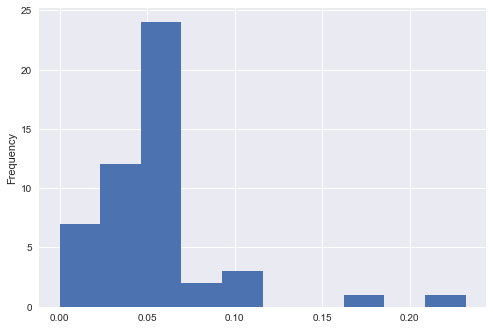

In [31]:
plt.figure()
proportional_tax['Corporate income tax'].plot.hist()
plt.show()

Furthermore, we can also see that corporate income taxes are a low percentage of tax revenue across all states, with only one state getting 20% of its tax revenue from corporate income taxes.

Finally, we can also get data as to multiple linear regression, where multiple independent variables are fit to a single dependent variable.  As to the two cases below, it is clear the both are linearly related, which only makes sense: as one source of proportional tax income goes up, the others go down.

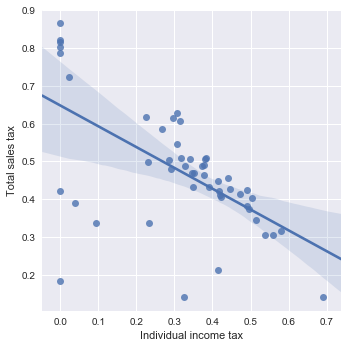

In [40]:
sns.lmplot(data=proportional_tax, x="Individual income tax", y="Total sales tax",fit_reg = True)
plt.show()

In [41]:
x = proportional_tax[['Individual income tax', 'Corporate income tax']]
y = proportional_tax['Total sales tax']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Total sales tax   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     34.60
Date:                Fri, 19 May 2017   Prob (F-statistic):           4.96e-10
Time:                        02:29:37   Log-Likelihood:                -14.049
No. Observations:                  50   AIC:                             32.10
Df Residuals:                      48   BIC:                             35.92
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
Individual income tax     0.6828      0.180      3.786      0.000         0.320     1.045
Corporate income tax      2.4776      0.972      2.549      0.014         0.524     4.432
==============================================================================
Omnibus:                        6.236   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.224
Skew:                           0.754   Prob(JB):                       0.0734
Kurtosis:                       3.485   Cond. No.                         7.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

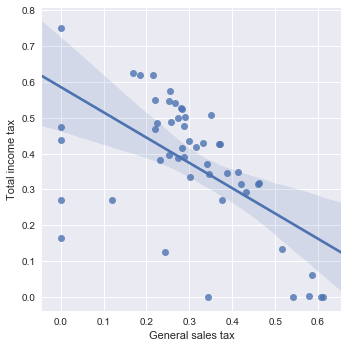

In [39]:
sns.lmplot(data=proportional_tax, x="General sales tax", y="Total income tax",fit_reg = True)
plt.show()

In [33]:
x = proportional_tax[['General sales tax', 'Selective sales tax']]
y = proportional_tax['Total income tax']
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Total income tax   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     43.11
Date:                Fri, 19 May 2017   Prob (F-statistic):           1.92e-11
Time:                        02:27:06   Log-Likelihood:                -1.1151
No. Observations:                  50   AIC:                             6.230
Df Residuals:                      48   BIC:                             10.05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
General sales tax       0.0248      0.202      0.122      0.903        -0.382     0.431
Selective sales tax     1.8014      0.380      4.742      0.000         1.038     2.565
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.829
Skew:                          -0.575   Prob(JB):                        0.243
Kurtosis:                       2.813   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## More plotting and data representation

As a different way to represent data, this is a violin plot.  In these types of plots, it’s very easy to see the data’s spread and skew.  In the second plot, we can see that there is an outlier point for the proportional selective sales tax, and by performing a simple operation on our DataFrame, we easily see that the outlier is New Hampshire. Furthermore, as in the last plot below, we can also easily se these types of trends over a period of time.  (This last dataset comes from https://github.com/jennybc/gapminder/blob/master/data-raw/08_gap-every-five-years.tsv .)  

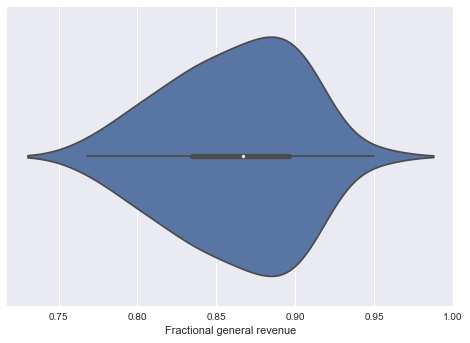

In [34]:
frac = pd.DataFrame(df_percent_revenue['Fractional general revenue'])
plt.figure()
fig, ax = plt.subplots()
ax = sns.violinplot(x="Fractional general revenue", data=frac, label="Fractional general revenue")
plt.show()

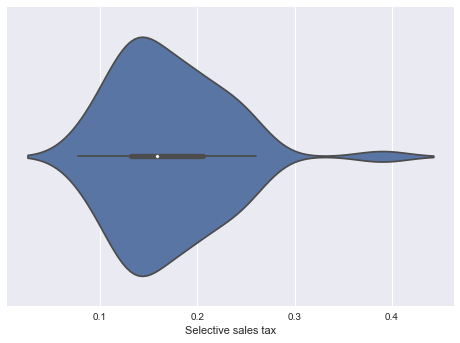

In [35]:
plt.figure()
fig, ax = plt.subplots()
ax = sns.violinplot(x="Selective sales tax", data = proportional_tax, label="Fractional selective sales tax")
plt.show()

In [36]:
top_selective_sales = proportional_tax[proportional_tax['Selective sales tax'] > .3]
top_selective_sales.head()

,Corporate income tax,General sales tax,Individual income tax,Selective sales tax,Total income tax,Total sales tax
NH,0.231809,0.0,0.038605,0.389954,0.270413,0.389954


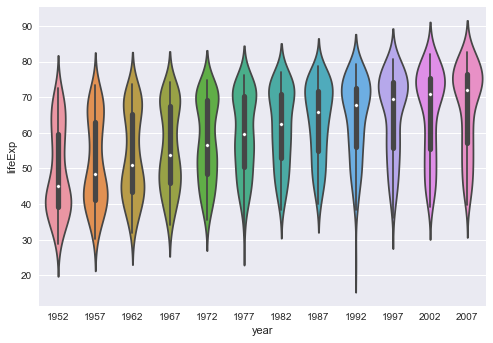

In [37]:
data = pd.read_csv("gap.tsv", sep='\t')
data.head()
plt.figure()
fig, ax = plt.subplots()
ax = sns.violinplot(x="year", y="lifeExp", data=data)
plt.show()